# 郵便番号shapefileの作成
1. 郵便番号割り振り
2. 領域の結合
3. shapefileで保存
4. QC

## 1 郵便番号割り振り

## 2 領域の結合
from shapely.ops import cascaded_union

polygons =  [df_.iloc[i]['geometry'] for i in range(len(df_))]

dissolved_polygons = cascaded_union(polygons)
df1 = gpd.GeoDataFrame({'geometry': [dissolved_polygons], 'code':'1'})

## 3 shapefileで保存
df.to_file('hoge.shp')

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import posuto
#https://github.com/polm/posuto
%matplotlib inline

df_tokyo = gpd.read_file('h12ka13.shp')

In [142]:
def remove_space(x):
    return x.replace('　', '').replace('　','')
df = pd.read_csv('KEN_ALL_ROME.CSV',encoding="SHIFT-JIS",header = None)
df.columns = ['number','pref','city','town','_','__','___']
df.city = df.city.apply(remove_space)
df.town = df.town.apply(remove_space)
df = df[df['pref'] == '東京都'].reset_index(drop = True)
df = df[df['city'] == '千代田区'].reset_index(drop = True)
#df = df[len(df['town']) <= 10].reset_index(drop = True)
df.head(6)

,number,pref,city,town,_,__,___
0,1000000,東京都,千代田区,以下に掲載がない場合,TOKYO TO,CHIYODA KU,IKANIKEISAIGANAIBAAI
1,1020072,東京都,千代田区,飯田橋,TOKYO TO,CHIYODA KU,IIDABASHI
2,1020082,東京都,千代田区,一番町,TOKYO TO,CHIYODA KU,ICHIBANCHO
3,1010032,東京都,千代田区,岩本町,TOKYO TO,CHIYODA KU,IWAMOTOCHO
4,1010047,東京都,千代田区,内神田,TOKYO TO,CHIYODA KU,UCHIKANDA
5,1000011,東京都,千代田区,内幸町,TOKYO TO,CHIYODA KU,UCHISAIWAICHO


In [ ]:
df['town']

In [136]:
df_tokyo[df_tokyo['CITY_NAME'] == '千代田区'].head(1)

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,MOJI,SEQ_NO2,KSUM,CSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,13101001001,13,101,001001,東京都,千代田区,丸の内１丁目,None,8101,374531.75,...,丸の内１丁目,3344.0,11,11,73.0,73.0,139.765936,35.682157,0010-01,"POLYGON ((139.76573 35.68468, 139.76637 35.684..."


In [137]:
df_tokyo[df_tokyo['S_NAME'] == '四番町']

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,MOJI,SEQ_NO2,KSUM,CSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
113,131010570,13,101,057000,東京都,千代田区,四番町,None,8101,100310.727,...,四番町,3188.0,10,17,1551.0,622.0,139.737878,35.689096,0570-00,"POLYGON ((139.73949 35.69089, 139.73975 35.690..."


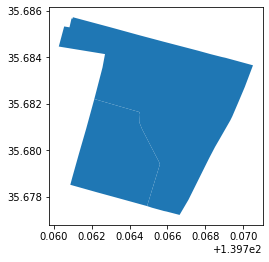

In [105]:
df_ = df_tokyo.head(2)
#df_ = df_[['geometry']]
df_.plot()
plt.show()

In [108]:
for y in range(len(df_)):
    print(df_.iloc[y]['geometry'])

POLYGON ((139.7657343155813 35.68467924993617, 139.7663671634398 35.6845452083835, 139.767612321781 35.68428129394623, 139.7682939664152 35.68412846680623, 139.768877572868 35.68400815231711, 139.769062769331 35.68397557675839, 139.7695027396875 35.68387806871807, 139.7705230034165 35.68365196046437, 139.7700919339185 35.68272532925114, 139.7697511825112 35.68206947250616, 139.7694295846887 35.68145971462013, 139.7693269780016 35.68129054734541, 139.7687624538989 35.68049077171516, 139.7685145958415 35.68014329366107, 139.7682041585813 35.67966170228144, 139.7679905117653 35.67931378393816, 139.7671136686308 35.67788139256424, 139.7666988242587 35.67730618823897, 139.7666413346857 35.67722647670985, 139.7659629741612 35.67736964947976, 139.7658202091894 35.67739354740522, 139.7651853670426 35.67753508529973, 139.7649235613821 35.67760599021324, 139.7656000673716 35.67939453708055, 139.7655618013588 35.67949775069537, 139.7653520431712 35.67981786559723, 139.7646634200106 35.68090514053

In [111]:
#from shapely.geometry import shape
polygons =  [df_.iloc[i]['geometry'] for i in range(len(df_))]
polygons

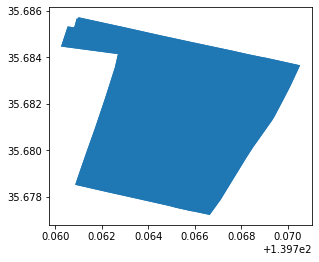

In [119]:
from shapely.ops import cascaded_union
dissolved_polygons = cascaded_union(polygons)

df1 = gpd.GeoDataFrame({'geometry': [dissolved_polygons,dissolved_polygons], 'code':['1','2']})
df1.plot()

In [120]:
df1.to_file('hoge.shp')
#mergedpoly =  df_.iloc[0].union(df_.iloc[1])

In [61]:
a = posuto.get('1000000')
a

PostalCode(jisx0402='13101', old_code='100  ', postal_code='1000000', prefecture='東京都', city='千代田区', neighborhood='', prefecture_kana='トウキョウト', city_kana='チヨダク', neighborhood_kana='', partial=False, chome=False, koazabanchi=False, multi=False, multiline=False, update_status='変更なし', update_reason='変更なし', note='以下に掲載がない場合', alternates=[])

In [7]:
from jusho import Jusho

postman = Jusho()
dir(postman)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'address_from_town',
 'c',
 'cities_from_prefecture',
 'close',
 'conn',
 'from_postal_code',
 'prefectures',
 'towns_from_city']

In [13]:
postman.address_from_town('東京都千代田区丸の内一丁目')

TypeError: address_from_town() missing 2 required positional arguments: 'city' and 'town'

In [14]:
postman.address_from_town?

Signature:
postman.address_from_town(
    prefecture: str,
    city: str,
    town: str,
    type='kana',
) -> Union[List[jusho.jusho.Address], List[NoneType]]
Docstring: <no docstring>
File:      ~/.pyenv/versions/testDash/lib/python3.7/site-packages/jusho/jusho.py
Type:      method
